# Extra Plots (except Sankey)

<small>**NOTE:** This notebook was used on top of the `ema_rwd_statistic.py` script for further plots.</small>

First we will import the needed packages:

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(context="paper", style="whitegrid")

dpi = 300
mpl.rcParams['figure.dpi'] = dpi

And the data:

In [3]:
variables_due_protocol = pd.read_excel(
    '../../output/ema_rwd/ema_rwd_final_statistics_variables.xlsx',
    sheet_name='due_protocol',
    index_col=0, 
)

variables_due_result= pd.read_excel(
    '../../output/ema_rwd/ema_rwd_final_statistics_variables.xlsx',
    sheet_name='due_result',
    index_col=0, 
)

## Histograms

In [4]:
# NOTE: previous version
# plt.figure(dpi=300)
# for df, label, name in [
#     (variables_due_protocol, 'studies with protocol due', 'due_protocol'),
#     (variables_due_result, 'studies with results due', 'due_results')
# ]:
#     date = df['registration_date'].dt.to_period('M')
#     pd.concat(
#         [
#             df.groupby(date).size().rename('studies'),
#             df.groupby(date).size().cumsum().rename(
#                 'cumulated studies')
#         ], axis='columns') \
#         .plot(
#             title=f'Frequency of {label} by "Registration Date"',
#             xlabel='Registration Date',
#             ylabel='# of studies',
#             subplots=True
#     )
#     plt.show()

In [5]:
variables = pd.read_excel(
    '../../output/ema_rwd/ema_rwd_final_statistics_variables.xlsx',
    sheet_name='all',
    index_col=0, 
)

In [6]:
outcome_hist_df = variables.filter(regex='has|due|registration_date').assign(
    due_rank = lambda df: df['due_protocol'].astype(int) + df['due_result'].astype(int),
    compliance_rank = lambda df: df['has_protocol'].astype(int) + df['has_result'].astype(int)
)

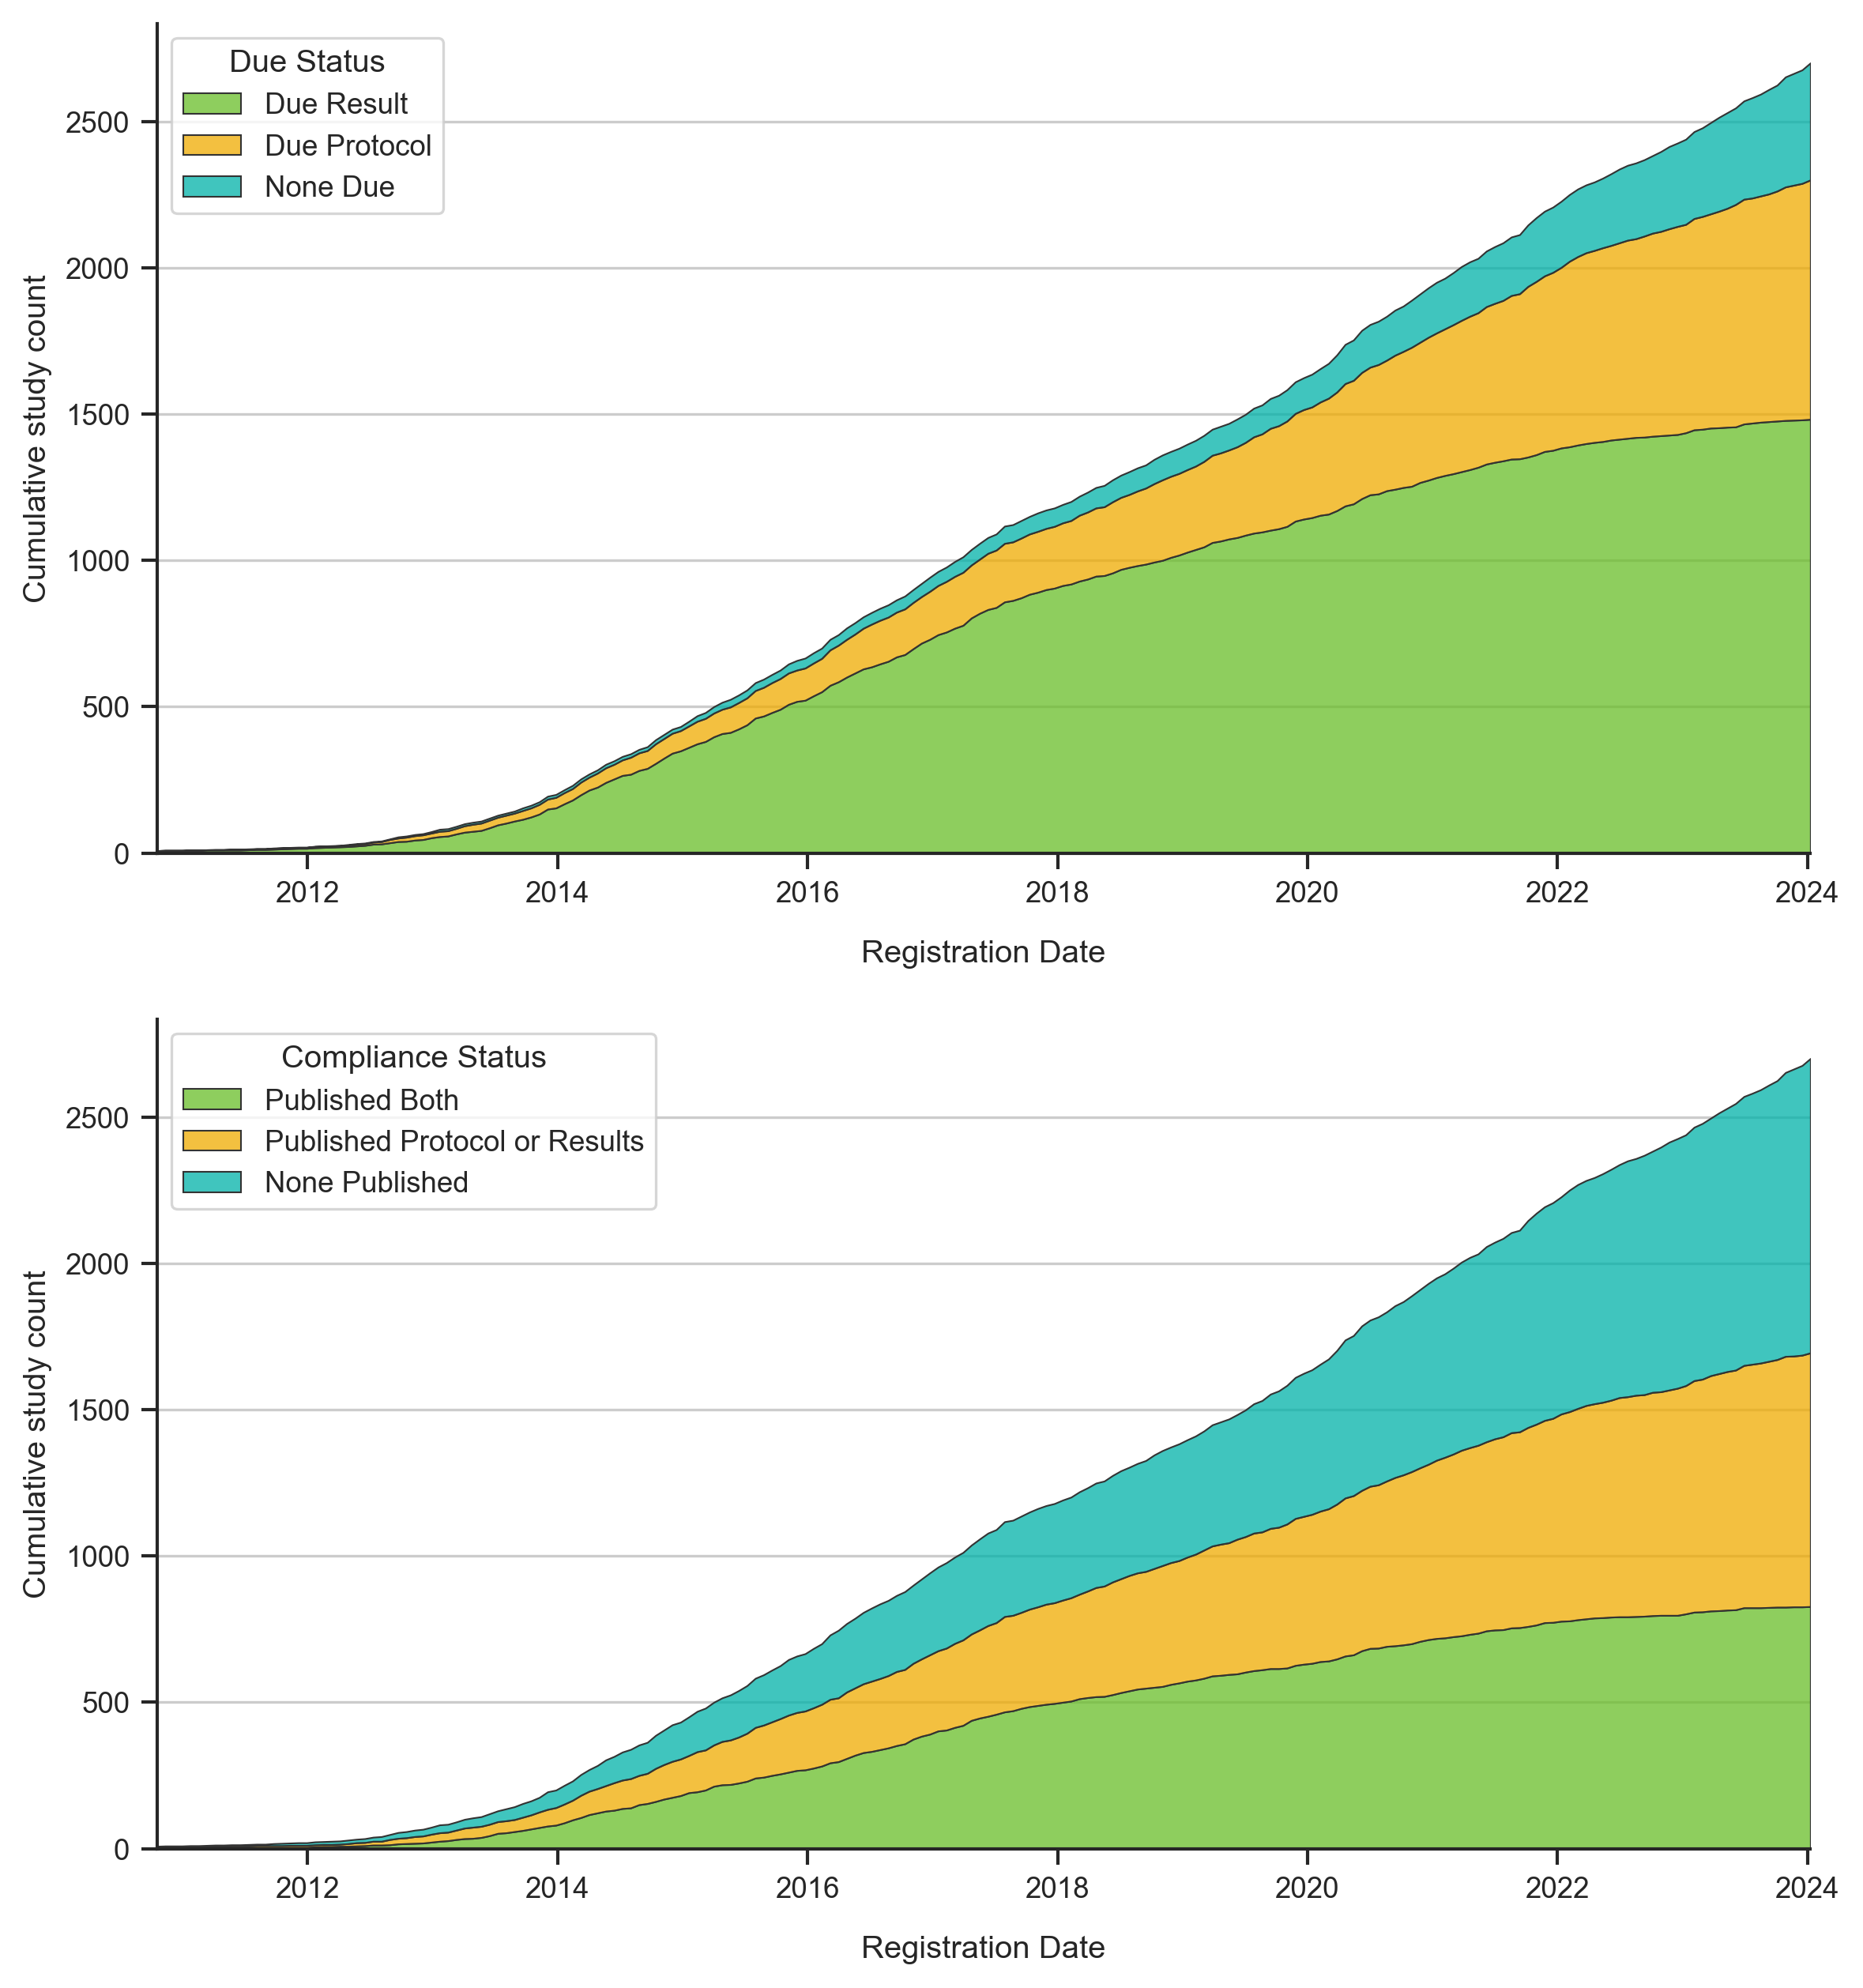

In [7]:
with sns.axes_style("ticks"):
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 10))

    sns.histplot(
        outcome_hist_df,
        x="registration_date",
        cumulative=True,
        hue='due_rank',
        bins=200,
        multiple="stack",
        element='poly',
        palette=['#00b2a9', '#f0ab00', '#69be28'],
        edgecolor=".2",
        linewidth=.5,
        ax=ax1,
    )

    sns.histplot(
        outcome_hist_df,
        x="registration_date",
        cumulative=True,
        hue='compliance_rank',
        bins=200,
        multiple="stack",
        element='poly',
        palette=['#00b2a9', '#f0ab00', '#69be28'],
        edgecolor=".2",
        linewidth=.5,
        ax=ax2,
    )

    for ax in [ax1, ax2]:
        ax.grid(axis='y')

        ax.set_xlabel('Registration Date', labelpad=10)
        ax.set_ylabel('Cumulative study count')

        ax.margins(x=0)

        sns.despine(ax=ax)

    ax1.legend(
        title='Due Status',
        labels=[
            'Due Result',
            'Due Protocol',
            'None Due'
        ],
        loc='upper left',
        frameon=True
    )

    ax2.legend(
        title='Compliance Status',
        labels=[
            'Published Both',
            'Published Protocol or Results',
            'None Published'
        ],
        loc='upper left',
        frameon=True
    )


## Barchart

In [8]:
def col_rename(col):
    result = col.replace('has_', 'due_with_').replace('_manual_count', '')
    return result

def snake_case_to_title(snake_case):
    return snake_case.replace('_', ' ').title()

outcomes_manual = (
    pd.read_csv(
        '../study_documents/merge_classifications/outcomes_manual.csv',
        index_col=0,
    )
    .rename(
        columns=col_rename
    ).assign(
        risk_management_plan = lambda df: df['risk_management_plan'].fillna('Unspecified'),
        due_with_abstract_only = lambda df: df['due_result_count'] & df['due_with_abstract_only'],
        due_with_final_study_report = lambda df: df['due_result_count'] & df['due_with_final_study_report'],
        due_with_result = lambda df: df['due_result_count'] & df['due_with_result'],
        due_with_protocol = lambda df: df['due_protocol_count'] & df['due_with_protocol']
    )
)

def get_outcomed_grouped_df(groupby_col: str) -> pd.DataFrame:
    tmp = outcomes_manual.groupby(groupby_col).sum()
    return tmp.assign(
        **{
            f'{col}_proportion': round(tmp[col] / tmp['due_result_count'] * 100, 1)
            for col in [
                'due_with_abstract_only', 'due_with_final_study_report', 'due_with_result'
            ]
        },
        due_with_protocol_proportion = round(tmp['due_with_protocol'] / tmp['due_protocol_count'] * 100, 1)
    ).sort_index(axis='columns')[[
        'count', 'due_result_count', 'due_protocol_count',
        'due_with_abstract_only', 'due_with_abstract_only_proportion',
        'due_with_final_study_report', 'due_with_final_study_report_proportion',
        'due_with_result', 'due_with_result_proportion',
        'due_with_protocol', 'due_with_protocol_proportion'
    ]]

outcomes_grouped_individual_rmp = get_outcomed_grouped_df('risk_management_plan')

outcomes_grouped_multiple_rmp = get_outcomed_grouped_df('grouped_risk_management_plan')

display(outcomes_grouped_individual_rmp)
display(outcomes_grouped_multiple_rmp)

,count,due_result_count,due_protocol_count,due_with_abstract_only,due_with_abstract_only_proportion,due_with_final_study_report,due_with_final_study_report_proportion,due_with_result,due_with_result_proportion,due_with_protocol,due_with_protocol_proportion
risk_management_plan,,,,,,,,,,,
All,2700,1482,2300,513,34.6,501,33.8,1014,68.4,1370,59.6
EU RMP category 1 (imposed as condition of marketing authorisation),119,68,112,40,58.8,21,30.9,61,89.7,76,67.9
EU RMP category 2 (specific obligation of marketing authorisation),39,19,33,13,68.4,4,21.1,17,89.5,21,63.6
EU RMP category 3 (required),711,401,625,138,34.4,166,41.4,304,75.8,419,67.0
Non-EU RMP only,149,81,129,33,40.7,23,28.4,56,69.1,87,67.4
Not applicable,1550,853,1292,272,31.9,275,32.2,547,64.1,715,55.3
Unspecified,132,60,109,17,28.3,12,20.0,29,48.3,52,47.7


,count,due_result_count,due_protocol_count,due_with_abstract_only,due_with_abstract_only_proportion,due_with_final_study_report,due_with_final_study_report_proportion,due_with_result,due_with_result_proportion,due_with_protocol,due_with_protocol_proportion
grouped_risk_management_plan,,,,,,,,,,,
All,2700,1482,2300,513,34.6,501,33.8,1014,68.4,1370,59.6
Imposed PAS,158,87,145,53,60.9,25,28.7,78,89.7,97,66.9
Other PAS,2542,1395,2155,460,33.0,476,34.1,936,67.1,1273,59.1


In [9]:
# NOTE: previous version
# with sns.axes_style("ticks"):
#     (
#         outcomes_grouped_multiple_rmp.iloc[:,[1,7,3,5]]
#         .rename(
#             columns=snake_case_to_title
#         )
#         .plot(
#             kind='bar',
#             figsize=(9, 5),
#             rot=0
#         )
#     )

#     sns.despine(offset=0, trim=False)

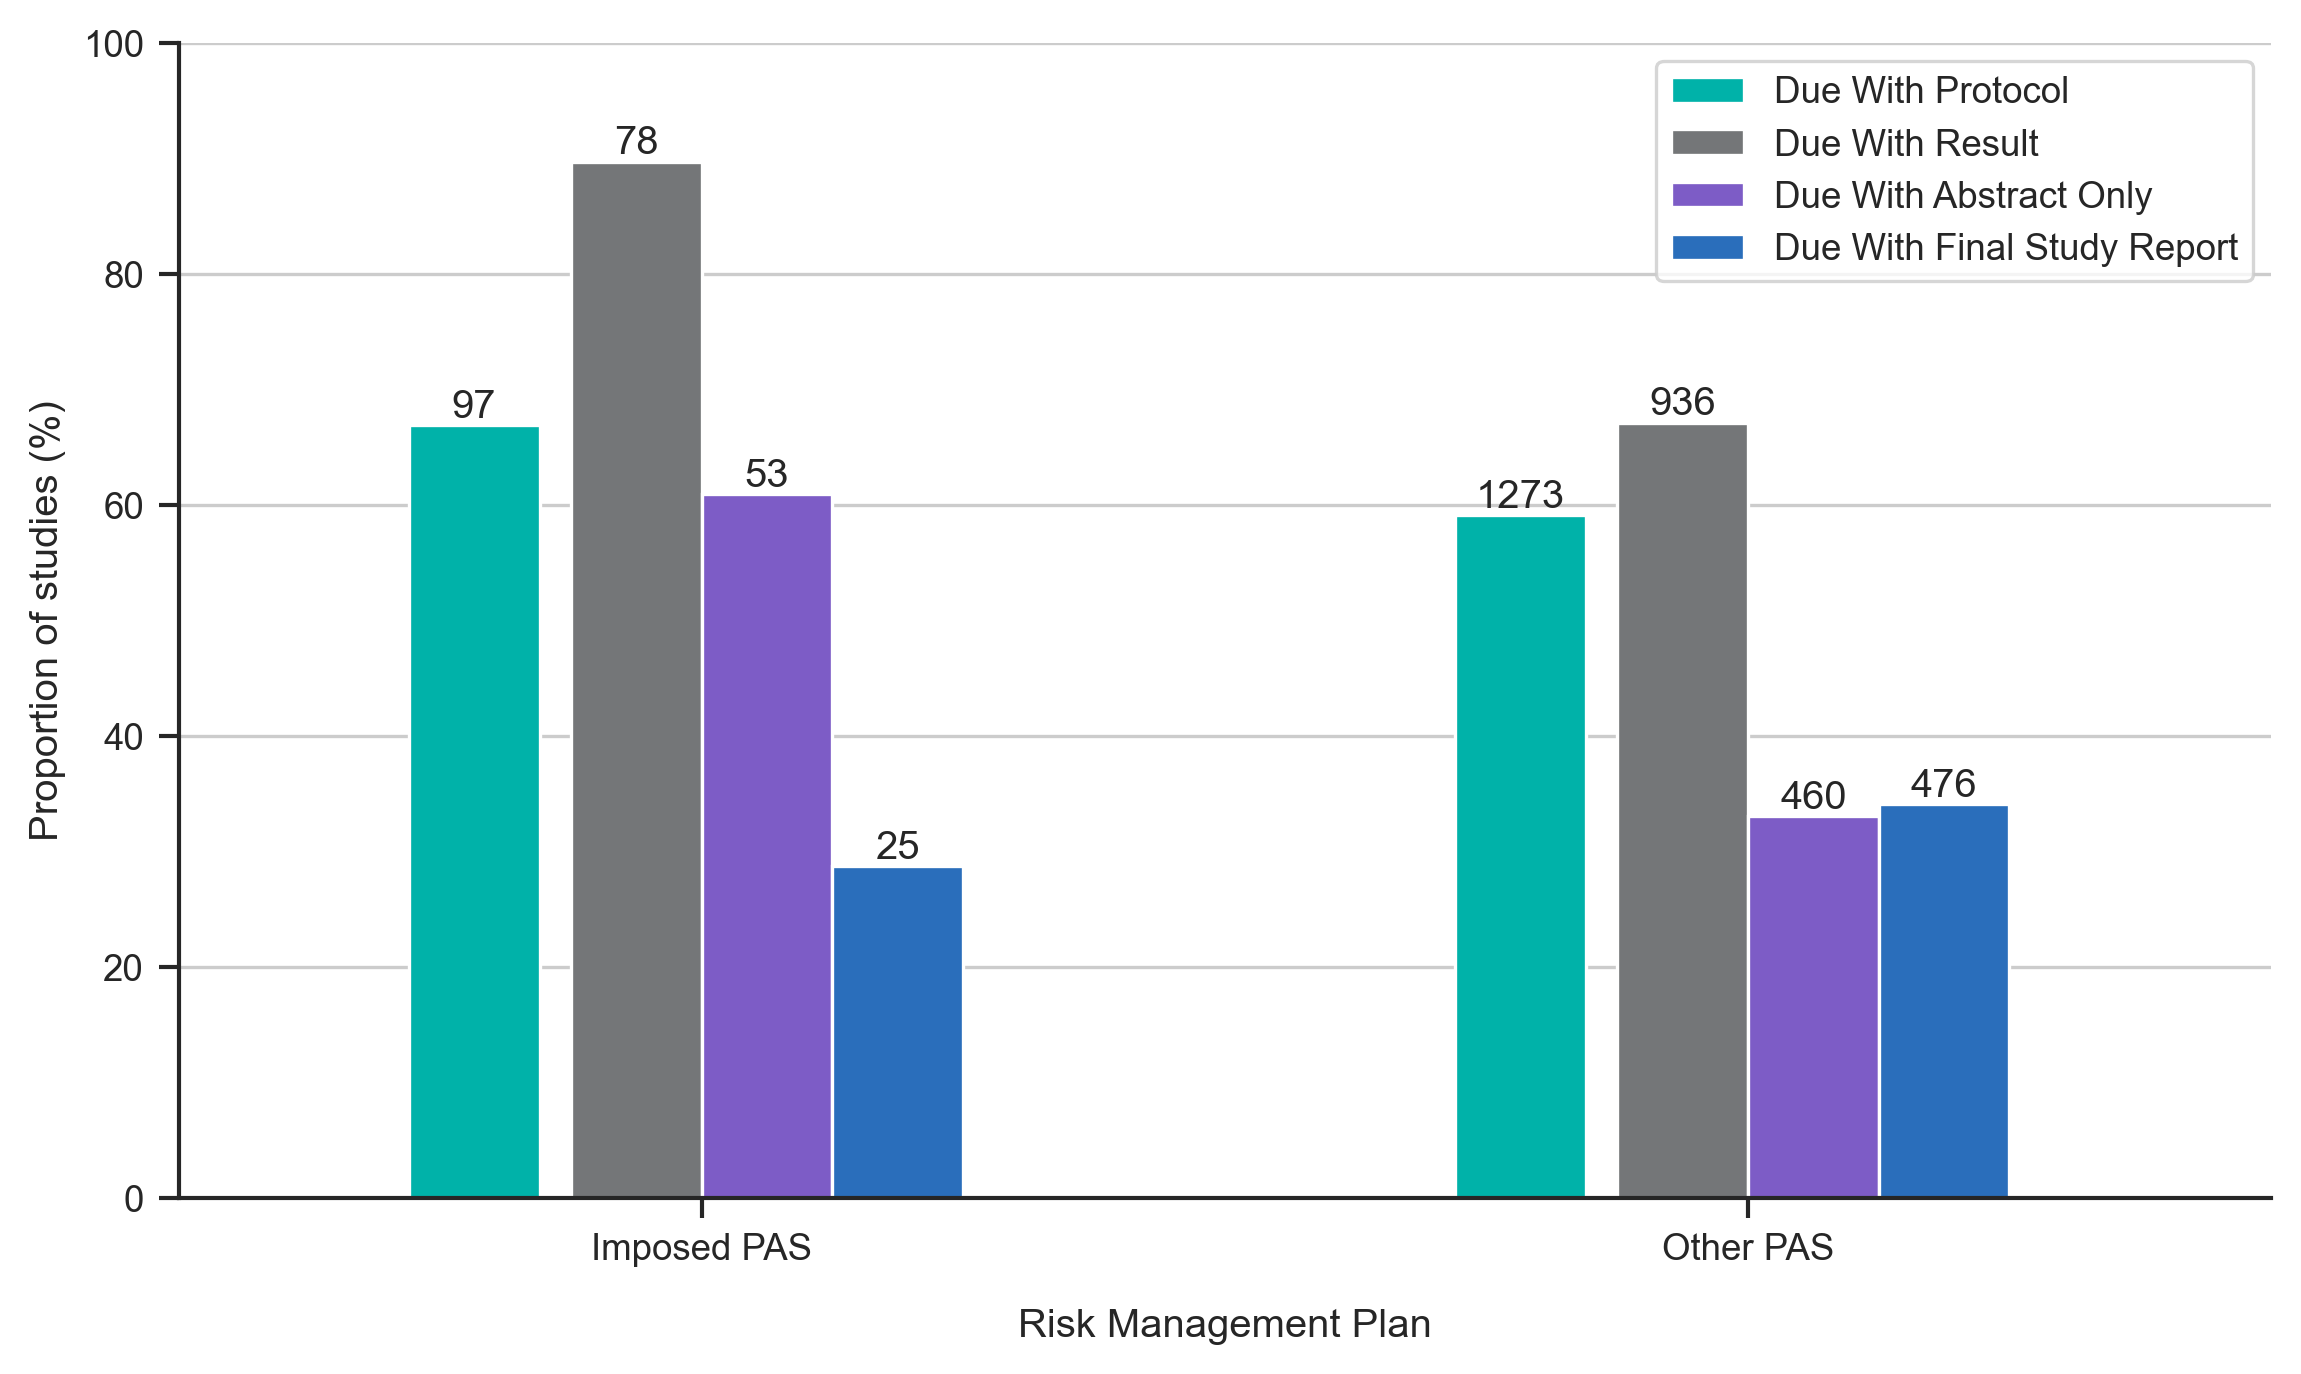

In [10]:
with sns.axes_style("ticks"):
    data = outcomes_grouped_multiple_rmp.drop('All', axis='index')

    data_relative = (
        data.iloc[:,[10,8,4,6]]
        .rename(columns=lambda x: x.replace('_proportion', ''))
        .rename(
            columns=snake_case_to_title
        )
    )

    data_absolute = (
        data.iloc[:,[9,7,3,5]]
        .rename(
            columns=snake_case_to_title
        )
    )

    ax = (
        data_relative
        .plot.bar(
            color=['#00b2a9', '#747678', '#7d5cc6', '#2a6ebb'],
            figsize=(9, 5),
            rot=0,
            grid=True,
            yticks=np.arange(0, 101, 20),
            ylabel='Proportion of studies (%)'
        )
    )

    ax.grid(axis='x')

    ax.set_xlabel('Risk Management Plan', labelpad=10)

    first_gap = 0.03
    for i, container in enumerate(ax.containers):
        for patch in container.patches:
            if i == 0:
                patch.set_x(patch.get_x() - first_gap)
            # if i == 0:
            #     patch.set_x(patch.get_x() - first_gap / 2)
            # else:
            #     patch.set_x(patch.get_x() + first_gap / 2)
        ax.bar_label(container, labels=data_absolute[container.get_label()], label_type='edge')

    sns.despine(ax=ax, offset=0, trim=False)

In [11]:
import itertools

def custom_bar_label(ax, container, labels, *,
                  padding=0, **kwargs):
    a, b = ax.yaxis.get_view_interval()
    y_inverted = a > b

    # want to know whether to put label on positive or negative direction
    # cannot use np.sign here because it will return 0 if x == 0
    def sign(x):
        return -1 if x >= 0 else 1

    bars = container.patches
    datavalues = container.datavalues

    annotations = []

    for bar, dat, lbl in itertools.zip_longest(
        bars, datavalues, labels
    ):
        (x0, y0), (x1, y1) = bar.get_bbox().get_points()
        xc = (x0 + x1) / 2

        extrema = min(y0, y1) if dat >= 0 else max(y0, y1)

        endpt = extrema

        xy = xc, endpt

        y_direction = -1 if y_inverted else 1
        xytext = 0, y_direction * sign(dat) * padding


        ha = 'center'
        if y_inverted:
            va = 'bottom' if dat > 0 else 'top'  # also handles NaN
        else:
            va = 'bottom' if dat < 0 else 'top'  # also handles NaN
           
        annotation = ax.annotate(lbl,
                                    xy, xytext, textcoords="offset points",
                                    ha=ha, va=va, **kwargs)
        annotations.append(annotation)

    return annotations

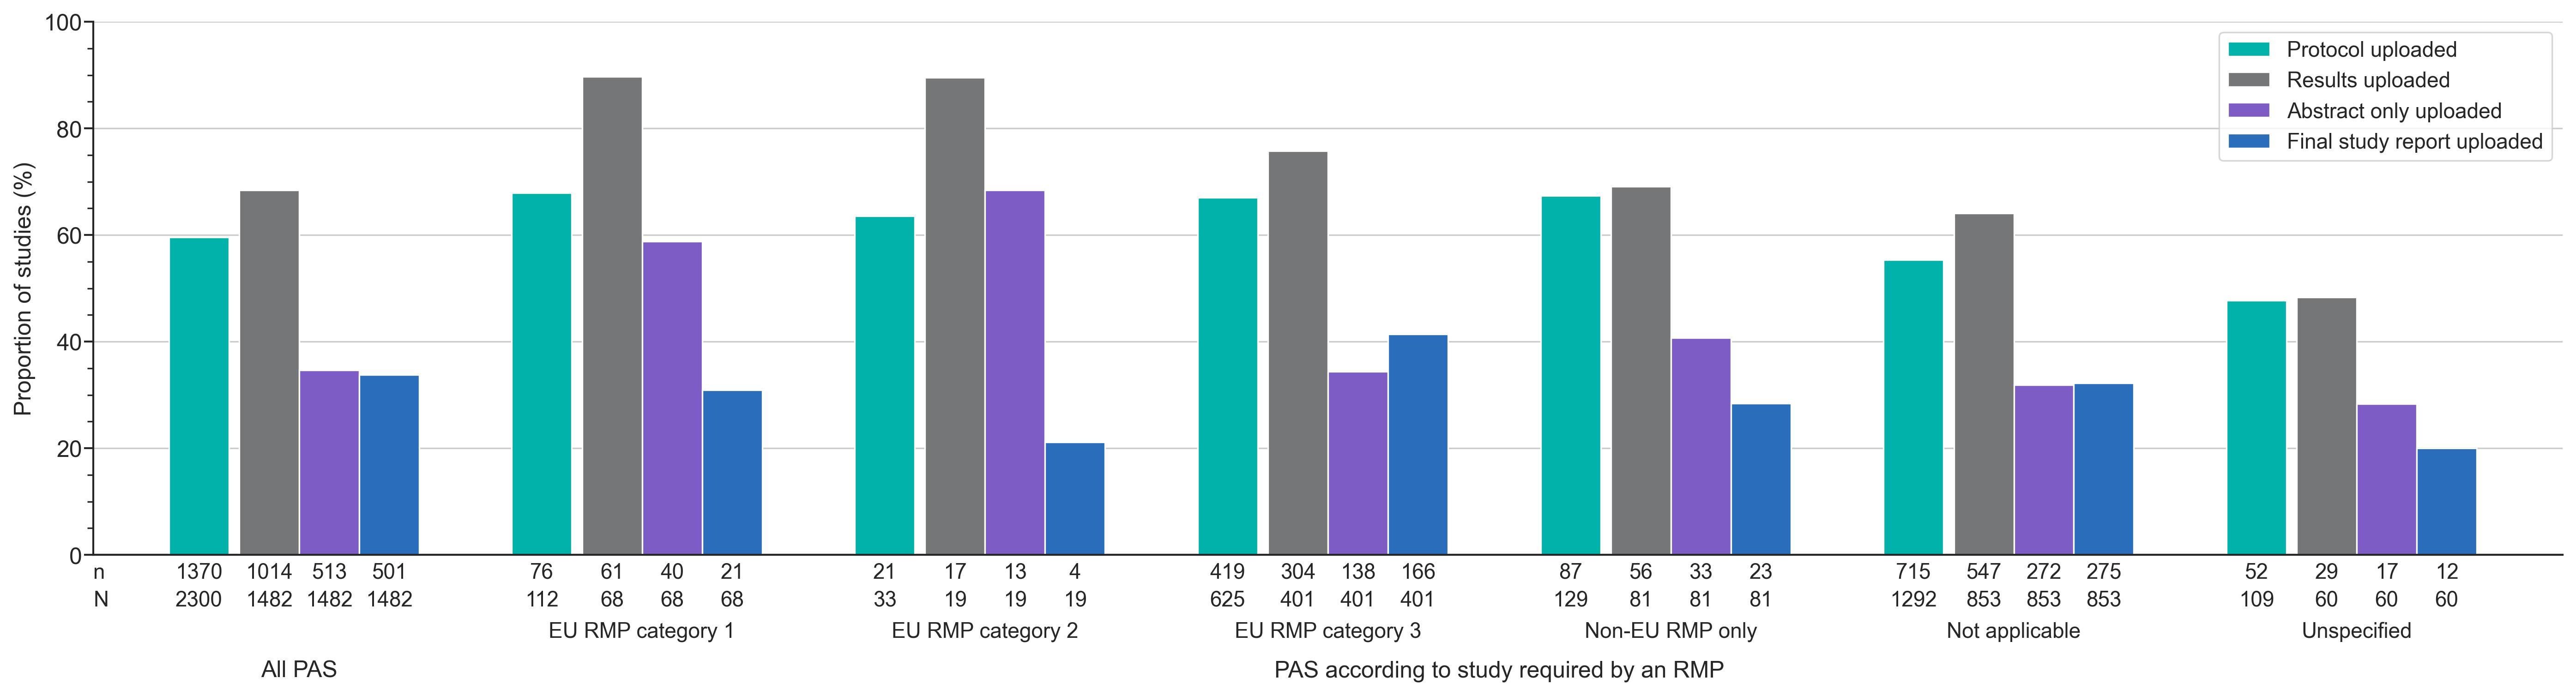

In [17]:
with sns.axes_style("ticks"):
    data = outcomes_grouped_individual_rmp.rename(
        index = {
            # 'All': 'All PAS',
            'All': '',
            'EU RMP category 1 (imposed as condition of marketing authorisation)': 'EU RMP category 1',
            'EU RMP category 2 (specific obligation of marketing authorisation)': 'EU RMP category 2',
            'EU RMP category 3 (required)': 'EU RMP category 3'
        }
    )

    data.index = '\n\n' + data.index.astype(str)

    data_relative = (
        data.iloc[:,[10,8,4,6]]
        .rename(columns=lambda x: x.replace('_proportion', ''))
        .rename(
            columns=snake_case_to_title
        )
    )

    data_absolute = (
        data.iloc[:,[9,7,3,5]]
        .rename(
            columns=snake_case_to_title
        )
    )

    ax = (
        data_relative
        .plot.bar(
            color=['#00b2a9', '#747678', '#7d5cc6', '#2a6ebb'],
            figsize=(23, 5),
            rot=0,
            grid=True,
            yticks=np.arange(0, 101, 20),
            # title='Proportion of studies publishing results',
            xlabel='',
            # ylabel='Proportion of studies (%)',
            width = 0.7
        )
    )

    # Grid
    ax.grid(axis='x')

    # Ticks and Labels
    ax.tick_params(
        axis='x', 
        bottom=False,
        labelsize=11,
        pad=6
    )
    sec = ax.secondary_xaxis(location=0)
    sec.set_xticks([0, 3.5], labels=['\n\n\nAll PAS', '\n\n\nPAS according to study required by an RMP'], linespacing=1.5)
    sec.tick_params(
        axis='x', 
        bottom=False,
        labelsize=12,
        pad=4
    )
    
    ax.tick_params(
        axis='y', 
        labelsize=12,
        pad=1
    )
    ax.set_ylabel('Proportion of studies (%)', fontsize=12)
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

    # Legend
    ax.legend(
        labels = [
            f"{label.removeprefix('Due With ').replace('Result', 'Results')} uploaded".capitalize()
            for label in ax.get_legend_handles_labels()[1]
        ],
        alignment='left',
        fontsize=11
    )

    first_gap = 0.03
    for i, container in enumerate(ax.containers):
        # print(len(container.patches))
        for patch in container.patches:
            if i == 0:
                patch.set_x(patch.get_x() - first_gap)
            # if i == 0:
            #     patch.set_x(patch.get_x() - first_gap / 2)
            # else:
            #     patch.set_x(patch.get_x() + first_gap / 2)
                # print(patch)

        # Under the bar 
        below_bar_annotations = custom_bar_label(
            ax,
            container,
            data_absolute[container.get_label()].astype(str) + '\n' + (
                data['due_protocol_count'].astype(str) 
                if 'Protocol' in container.get_label() 
                else data['due_result_count'].astype(str)
            ),
            padding=4,
            linespacing=1.5,
            fontsize=11
        )

        # Over the bar
        # ax.bar_label(
        #     container, 
        #     labels=data_absolute[container.get_label()], 
        #     label_type='edge',
        #     padding=1
        # )

    # print(below_bar_annotations[0].xy, below_bar_annotations[0].)

    ax.annotate('n\nN', (ax.xaxis.get_view_interval()[0],0), (0,-4), textcoords="offset points", ha='left', va='top', linespacing=1.5, fontsize=11)
        
    sns.despine(ax=ax, offset=0, trim=False)

In [13]:
protocol_due_grouped = variables_due_protocol.groupby("due_protocol_year")
protocol_due_data = pd.merge(
    protocol_due_grouped.size().rename("due_protocol_count").to_frame(),
    protocol_due_grouped['has_protocol'].sum().rename("has_protocol_count").to_frame(),
    left_index=True,
    right_index=True
).assign(
    has_protocol_proportion = lambda df: (df["has_protocol_count"] / df["due_protocol_count"]) * 100
)

result_due_grouped = variables_due_result.groupby("due_result_year")
result_due_data = pd.merge(
    result_due_grouped.size().rename("due_result_count").to_frame(),
    result_due_grouped['has_result'].sum().rename("has_result_count").to_frame(),
    left_index=True,
    right_index=True
).assign(
    has_result_proportion = lambda df: (df["has_result_count"] / df["due_result_count"]) * 100
)

In [14]:
protocol_due_data.assign(
    has_protocol_proportion = lambda df: df['has_protocol_proportion'].round(2)
)

,due_protocol_count,has_protocol_count,has_protocol_proportion
due_protocol_year,,,
1994,1,0,0.00
1997,3,2,66.67
1998,1,0,0.00
1999,1,0,0.00
2000,2,2,100.00
2001,1,0,0.00
2002,3,2,66.67
2004,9,2,22.22
2005,7,2,28.57


In [15]:
result_due_data.assign(
    has_result_proportion = lambda df: df['has_result_proportion'].round(2)
)

,due_result_count,has_result_count,has_result_proportion
due_result_year,,,
2003,1,0,0.00
2005,1,0,0.00
2007,1,0,0.00
2010,4,1,25.00
2011,11,2,18.18
2012,13,6,46.15
2013,48,31,64.58
2014,67,39,58.21
2015,96,54,56.25


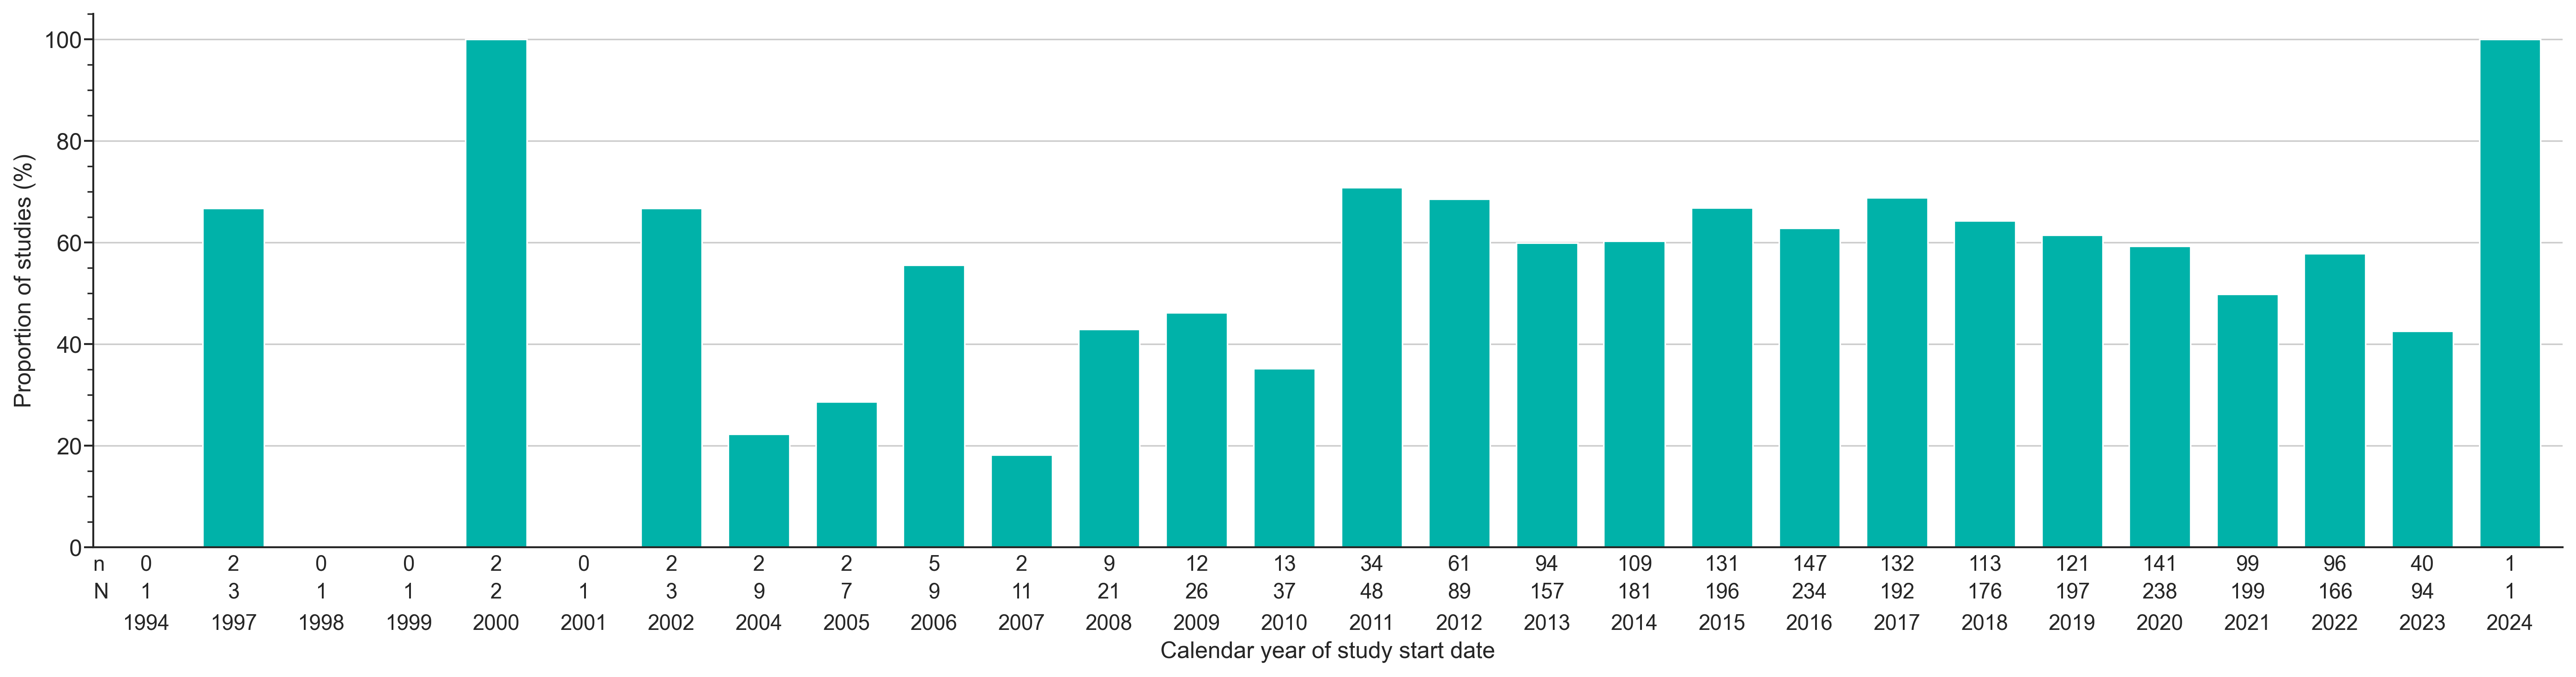

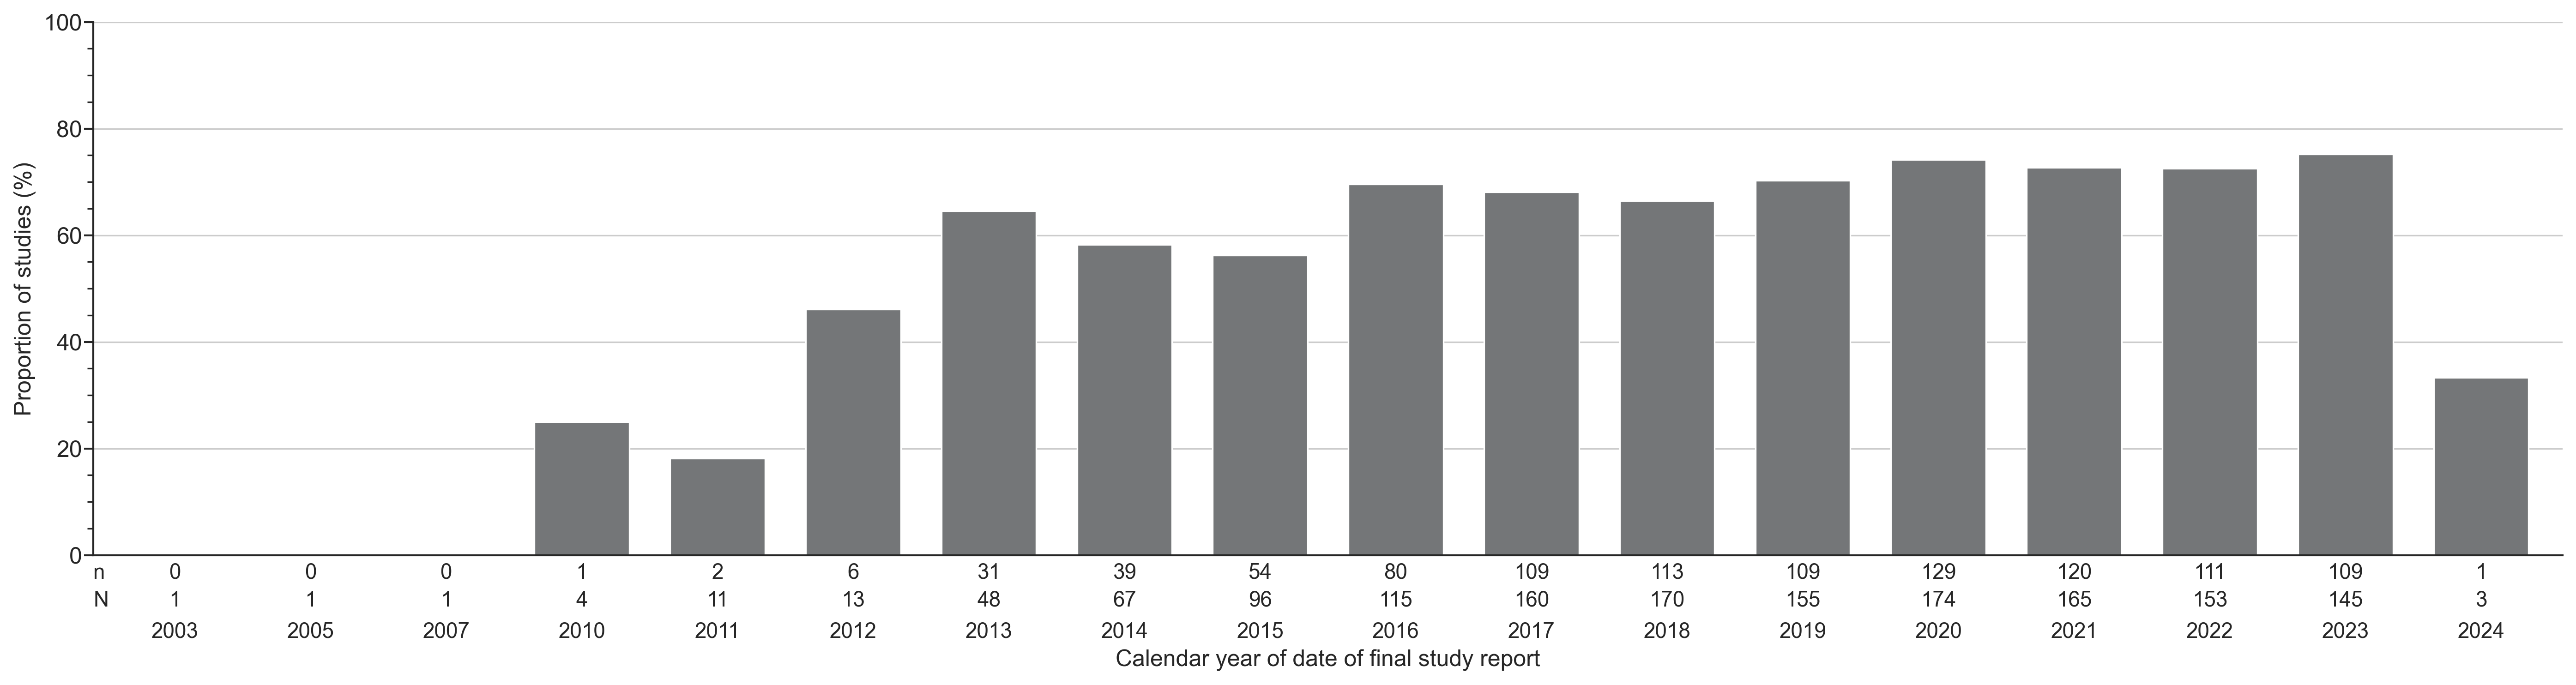

In [16]:
with sns.axes_style("ticks"):

    for data, label in [(protocol_due_data, 'protocol'), (result_due_data, 'result')]:

        original_data = data.copy()

        data = data[[f"has_{label}_proportion"]].rename_axis(
            index = "years"
        )

        data.index = '\n\n' + data.index.astype(str)

        ax = (
            data
            .plot.bar(
                color=[
                    '#00b2a9' if label == 'protocol' else '#747678'
                ],
                # figsize=(len(data), 5),
                figsize=(23, 5),
                rot=0,
                grid=True,
                yticks=np.arange(0, 101, 20),
                width = 0.7,
                legend=False
            )
        )

        # Grid
        ax.grid(axis='x')

        # Ticks and Labels
        ax.tick_params(
            axis='x', 
            bottom=False,
            labelsize=11,
            pad=6
        )
        ax.set_xlabel(f'Calendar year of {"study start date" if label == "protocol" else "date of final study report"}', fontsize=12)

        ax.tick_params(
            axis='y', 
            labelsize=12,
            pad=1
        )
        
        ax.set_ylabel('Proportion of studies (%)', fontsize=12)
        ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

        for i, container in enumerate(ax.containers):

            # Under the bar 
            below_bar_annotations = custom_bar_label(
                ax,
                container,
                (
                    original_data['has_protocol_count'].astype(str) 
                    if 'protocol' in container.get_label() 
                    else original_data['has_result_count'].astype(str)
                ) + '\n' + 
                (
                    original_data['due_protocol_count'].astype(str) 
                    if 'protocol' in container.get_label() 
                    else original_data['due_result_count'].astype(str)
                ),
                padding=4,
                linespacing=1.5,
                fontsize=11
            )

        ax.annotate('n\nN', (ax.xaxis.get_view_interval()[0],0), (0,-4), textcoords="offset points", ha='left', va='top', linespacing=1.5, fontsize=11)
            
        sns.despine(ax=ax, offset=0, trim=False)

## Experiments

In [16]:
na_values = [
    "", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", 
    "1.#IND", "1.#QNAN", "<NA>", "NULL", "NaN", "None", "nan", "null"
    # "N/A",
    # "NA",
    # "n/a",
]

def python_name_converter(x):
        return '_'.join([word.lower() for word in x.split(' ')]) if x[0] != '$' else x

raw = pd.read_excel(
    '../../output/ema_rwd/ema_rwd_final.xlsx', 
    index_col=0, 
    keep_default_na=False,
    na_values=na_values,
    na_filter=True
).rename(
    columns=python_name_converter
)

In [17]:
# for period in ['M', 'Q', 'Y']:
#     date = raw['registration_date'].dt.to_period(period)
#     raw.groupby(date).size().plot()
#     plt.show()

In [18]:
raw = raw.assign(
    registration_month = raw['registration_date'].dt.to_period('M').astype(str),
    registration_quartal = raw['registration_date'].dt.to_period('Q').astype(str)
)

In [19]:
state_hist_df = raw.filter(regex=r'\$UPDATED_state|registration')
state_hist_df = state_hist_df.assign(registration_year = state_hist_df['registration_date'].dt.year)
state_hist_df = state_hist_df.rename(columns={'$UPDATED_state': 'State'}).rename(
    columns=lambda x : ' '.join([y.capitalize() for y in x.split('_')])
)
state_hist_df = pd.merge(state_hist_df, state_hist_df.groupby('Registration Year').size().rename('size').to_frame(), on='Registration Year')
state_hist_df = state_hist_df.assign(weight = 100 / state_hist_df['size'])

state_hue_order = [
    'Planned',
    'Ongoing',
    'Finalised'
]

state_hist_df

,Registration Date,State,$updated State Eq State,$updated State Override,Registration Month,Registration Quartal,Registration Year,size,weight
0,2010-10-27,Finalised,True,NaN,2010-10,2010Q4,2010,9,11.111111
1,2010-10-25,Finalised,True,NaN,2010-10,2010Q4,2010,9,11.111111
2,2010-10-06,Finalised,True,NaN,2010-10,2010Q4,2010,9,11.111111
3,2010-10-20,Finalised,True,NaN,2010-10,2010Q4,2010,9,11.111111
4,2010-10-26,Finalised,True,NaN,2010-10,2010Q4,2010,9,11.111111
...,...,...,...,...,...,...,...,...,...
2755,2024-01-18,Ongoing,True,NaN,2024-01,2024Q1,2024,24,4.166667
2756,2024-01-16,Planned,True,NaN,2024-01,2024Q1,2024,24,4.166667
2757,2024-01-22,Planned,True,NaN,2024-01,2024Q1,2024,24,4.166667
2758,2024-01-22,Planned,True,NaN,2024-01,2024Q1,2024,24,4.166667


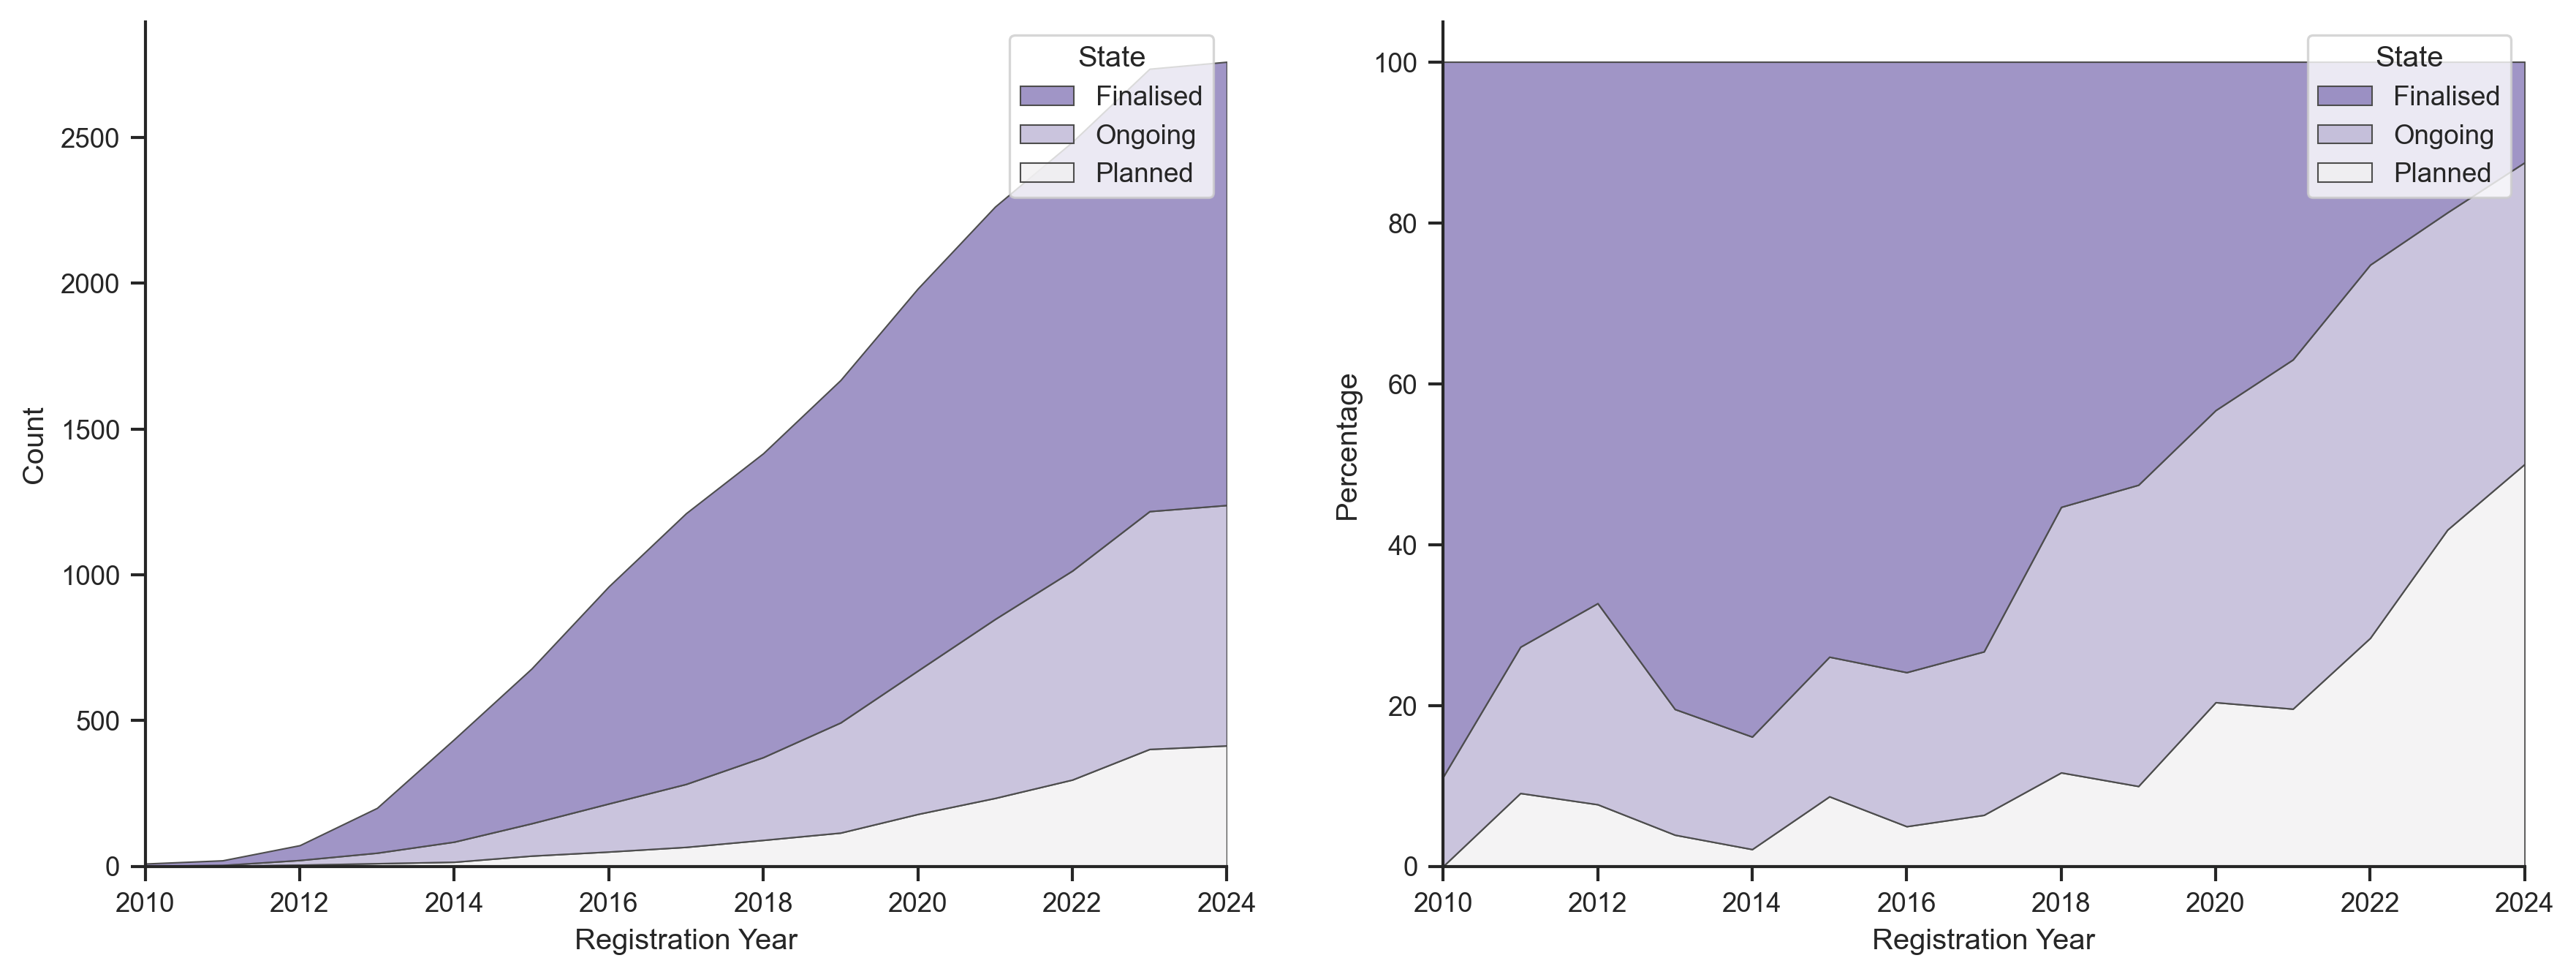

In [20]:
with sns.axes_style("ticks"):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(
        state_hist_df,
        x="Registration Year",
        hue='State',
        hue_order=reversed(state_hue_order),
        multiple="stack",
        cumulative=True,
        element='poly',
        discrete=True,
        palette="light:m_r",
        edgecolor=".3",
        linewidth=.5,
        # kde=True,
        ax=ax1
    )

    sns.histplot(
        state_hist_df,
        x="Registration Year",
        weights="weight",
        hue='State',
        hue_order=reversed(state_hue_order),
        multiple="stack",
        element='poly',
        discrete=True,
        palette="light:m_r",
        edgecolor=".3",
        linewidth=.5,
        # element="poly",
        ax=ax2,
    )

    ax2.set_ylabel('Percentage')

    ax1.margins(x=0)
    ax2.margins(x=0)
    sns.despine(f)

In [21]:
rmp_rename_map = {
    'EU RMP category 1 (imposed as condition of marketing authorisation)': 'EU RMP category 1',
    'EU RMP category 2 (specific obligation of marketing authorisation)': 'EU RMP category 2',
    'EU RMP category 3 (required)': 'EU RMP category 3',
    'Non-EU RMP only': 'Non-EU RMP only',
    'Not applicable': 'Not applicable'
}

rmp_hist_df = raw.filter(regex='risk_management_plan|registration_date')
rmp_hist_df.loc[:, 'registration_date'] = rmp_hist_df['registration_date'].dt.year
rmp_hist_df.loc[:, 'risk_management_plan'] = rmp_hist_df['risk_management_plan'].map(rmp_rename_map).fillna('Unspecified')
rmp_hist_df = rmp_hist_df.rename(columns={'risk_management_plan': 'Risk Managment Plan', 'registration_date': 'Registration Year'})
rmp_hist_df = pd.merge(rmp_hist_df, rmp_hist_df.groupby('Registration Year').size().rename('size').to_frame(), on='Registration Year')
rmp_hist_df['weight'] = 100 / rmp_hist_df['size']

rmp_hue_order = [
    'EU RMP category 1',
    'EU RMP category 2',
    'EU RMP category 3',
    'Non-EU RMP only',
    'Not applicable',
    'Unspecified'
]

rmp_hist_df

,Registration Year,Risk Managment Plan,size,weight
0,2010,Unspecified,9,11.111111
1,2010,Unspecified,9,11.111111
2,2010,Not applicable,9,11.111111
3,2010,Not applicable,9,11.111111
4,2010,EU RMP category 3,9,11.111111
...,...,...,...,...
2755,2024,Not applicable,24,4.166667
2756,2024,EU RMP category 3,24,4.166667
2757,2024,EU RMP category 3,24,4.166667
2758,2024,EU RMP category 3,24,4.166667


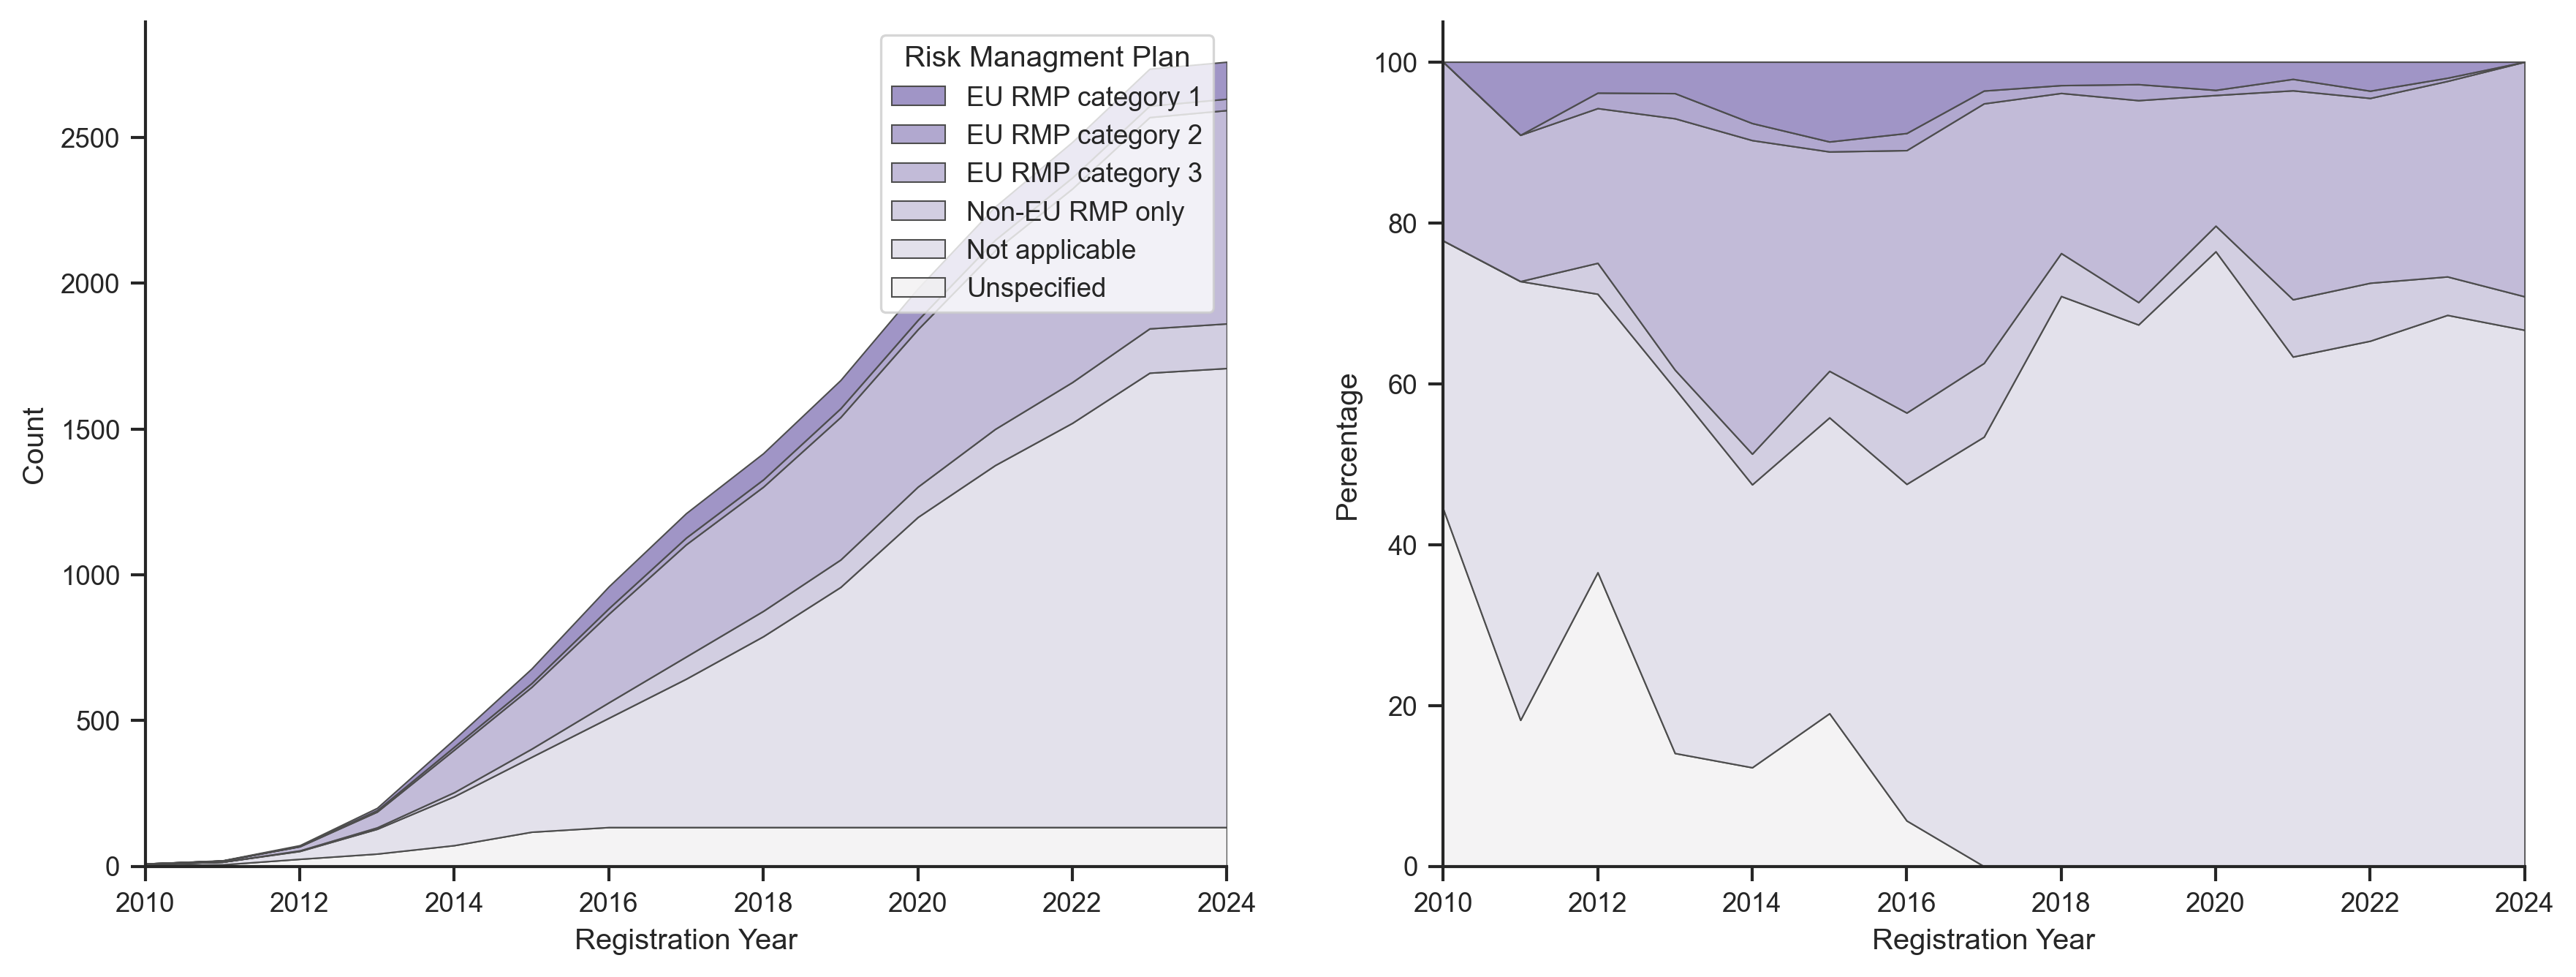

In [22]:
with sns.axes_style("ticks"):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(
        rmp_hist_df,
        x="Registration Year",
        hue='Risk Managment Plan',
        hue_order=rmp_hue_order,
        multiple="stack",
        cumulative=True,
        element='poly',
        discrete=True,
        palette="light:m_r",
        edgecolor=".3",
        linewidth=.5,
        # kde=True,
        ax=ax1
    )

    sns.histplot(
        rmp_hist_df,
        x="Registration Year",
        weights="weight",
        hue='Risk Managment Plan',
        hue_order=rmp_hue_order,
        multiple="stack",
        element='poly',
        discrete=True,
        palette="light:m_r",
        edgecolor=".3",
        linewidth=.5,
        legend=False,
        # element="poly",
        ax=ax2,
    )

    ax2.set_ylabel('Percentage')

    ax1.margins(x=0)
    ax2.margins(x=0)
    sns.despine(f)